In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [3]:
result_loc = "./../../../../Server_results/02_18_2022/"
run_name = "experiment18_02_11_54_31"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

# result_loc = "./../../../../Server_results/10_24_2021_less_tol/"
# run_name = "experiment23_10_01_07_23"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [4]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [5]:
q_x.shape

(127, 64, 50)

In [6]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [7]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


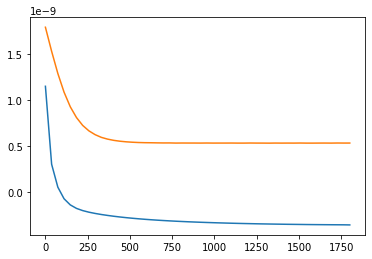

In [8]:
epoch = 121
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 0
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


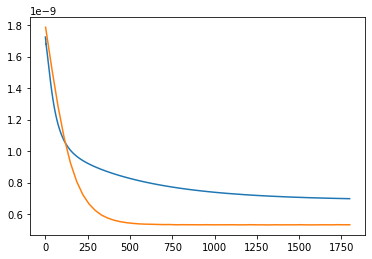

In [9]:
epoch = 0


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

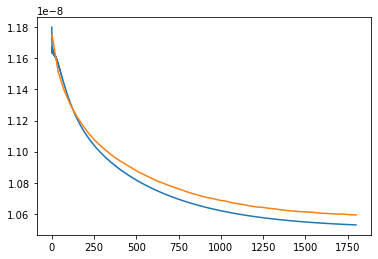

In [10]:
epoch = 1
plt.plot(q_MC_x.mean(axis=0))
# plt.plot(q_MC_x.min(axis=0))
# plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [11]:
p[50,:]

array([6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       6.25000000e-02, 6.25000000e-02, 6.25000000e-02, 6.25000000e-02,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
       2.32504749e-45, 2.32504749e-45, 2.32504749e-45, 2.32504749e-45,
      

In [12]:
k_x[50,:,40]

array([1.79048056e-05, 1.05444923e-05, 1.23712109e-05, 8.11072786e-06,
       8.71579558e-06, 1.05442157e-05, 4.53998869e-05, 9.77041826e-06,
       1.53602209e-05, 1.05444007e-05, 1.49026853e-05, 8.11059639e-06,
       9.78983301e-06, 1.23715188e-05, 1.85461254e-05, 8.64056718e-06,
       1.00284022e-05, 9.99603483e-06, 9.99034977e-06, 1.00073264e-05,
       9.99980221e-06, 1.00063833e-05, 1.00060883e-05, 9.96514840e-06,
       1.00126050e-05, 9.97286523e-06, 9.99832116e-06, 9.97626996e-06,
       1.00215407e-05, 1.00108611e-05, 1.00079885e-05, 9.97989281e-06,
       9.96479919e-06, 9.99121711e-06, 1.00368934e-05, 9.97749520e-06,
       1.00436444e-05, 1.00006172e-05, 9.99741282e-06, 9.98495286e-06,
       1.00317171e-05, 1.00161895e-05, 9.99596129e-06, 1.00255635e-05,
       1.00326976e-05, 1.00471456e-05, 9.97825115e-06, 1.00081424e-05,
       9.98614328e-06, 1.00085899e-05, 9.99737540e-06, 1.00060084e-05,
       9.99942365e-06, 1.00007475e-05, 9.97947546e-06, 1.00046119e-05,
      

In [13]:
k_xy[36,:,40]

array([-6.52698067e-06, -2.75334884e-08, -2.75334563e-08, -1.76719010e-08,
       -1.76710539e-08, -2.75328246e-08, -4.09611398e-08, -1.76715956e-08,
       -3.44297405e-07, -3.33381870e-07, -3.43033596e-07, -3.48391601e-07,
       -3.43469663e-07, -3.54709207e-07, -3.53927328e-07, -3.38983167e-07,
       -3.61295039e-07, -3.31006543e-07, -3.43333784e-07, -3.56919292e-07,
       -3.54872230e-07, -3.51389510e-07, -3.57289079e-07, -3.34086603e-07,
       -3.53926909e-07, -3.45811405e-07, -3.43801940e-07, -3.37723785e-07,
       -3.27745769e-07, -3.53762525e-07, -3.56482393e-07, -3.44478628e-07,
       -3.42528439e-07, -3.61810089e-07, -3.44046043e-07, -3.30421909e-07,
       -3.44446099e-07, -3.41848094e-07, -3.52361159e-07, -3.42646172e-07,
       -3.60426811e-07, -3.42083765e-07, -3.39489130e-07, -3.56572353e-07,
       -3.47450758e-07, -3.54731194e-07, -3.56298701e-07, -3.47494080e-07,
       -3.45621102e-07, -3.42983275e-07, -3.59214777e-07, -3.34109398e-07,
       -3.31018098e-07, -

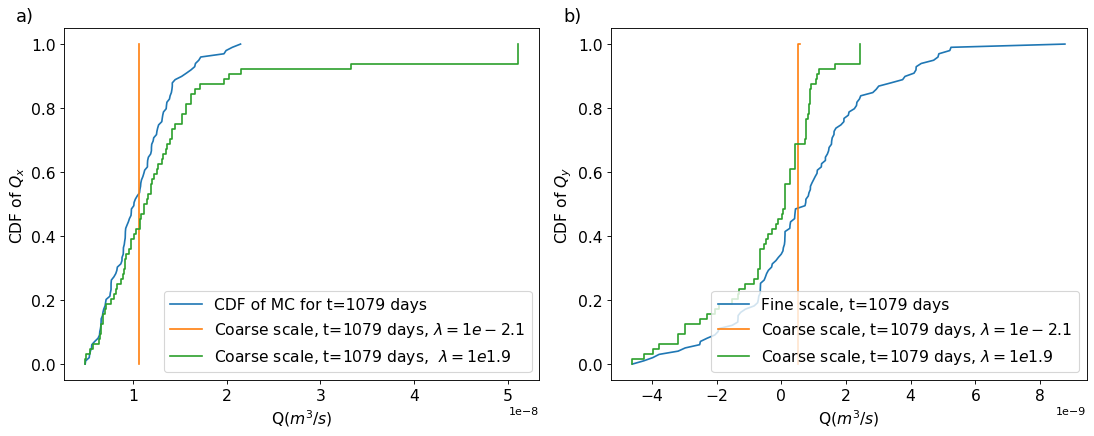

In [14]:
epoch_1 = 20
epoch_2 = 100

time_step = 30


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
# plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [18]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [19]:
# b_perc =df_perc


In [46]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [62]:
epoch = 50
t = np.linspace(0,1800,N_steps)

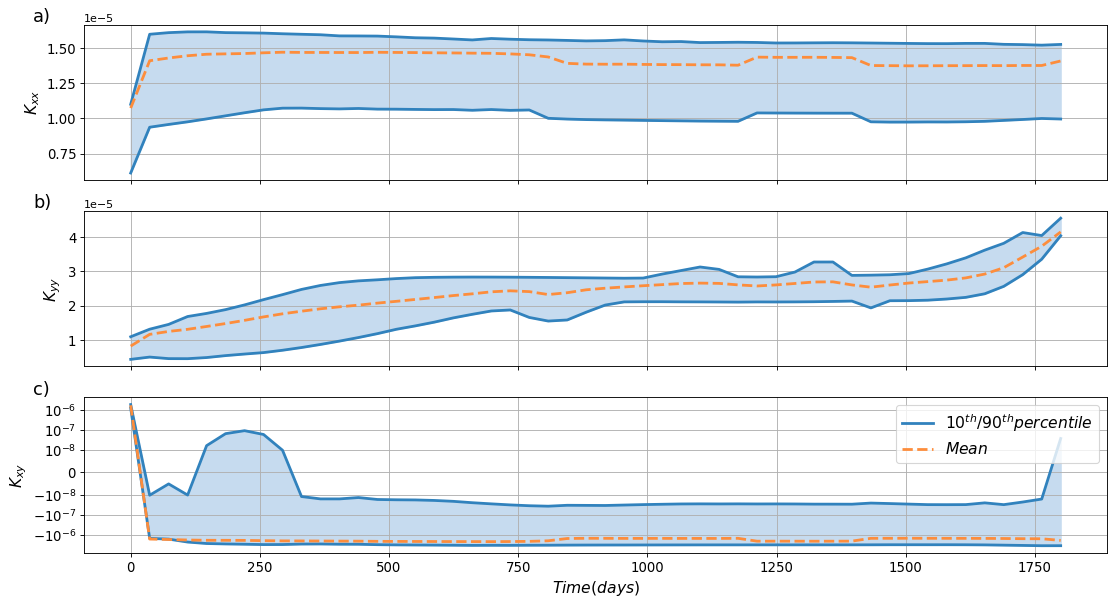

In [63]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)


In [57]:
p[200,:]

IndexError: index 200 is out of bounds for axis 0 with size 141